<a href="https://colab.research.google.com/github/odenmehmet/DL_Project/blob/main/Yapay_Sinir_A%C4%9F%C4%B1_(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
# MNIST verisini indir ve yükle
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Görselleri [0,1] aralığına normalleştir
x_train, x_test = x_train / 255.0, x_test / 255.0

# Şekli kontrol et
print(x_train.shape)  # (60000, 28, 28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


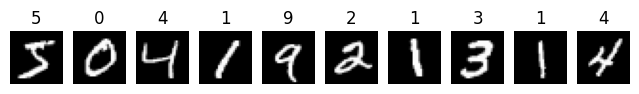

In [3]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.show()


In [38]:
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomTranslation(0.1, 0.1)
])

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # 28x28 resmi düzleştir (784,)
    keras.layers.Dense(256, activation='relu'),   # 1. gizli katman
    keras.layers.BatchNormalization(),            # Batch Normalization
    keras.layers.Dropout(0.3),                    # Overfittingi önlemek için
    keras.layers.Dense(128, activation='relu'),   # 2. gizli katman
    keras.layers.Dropout(0.3),                    # Overfittingi önlemek için
    keras.layers.Dense(64, activation='relu'),    # 2. gizli katman
    keras.layers.Dense(10, activation='softmax')  # Çıkış katmanı (0-9)
])


In [39]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [61]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,     # %10'unu doğrulama için ayır
    verbose=2
)


Epoch 1/5
844/844 - 4s - 5ms/step - accuracy: 0.9880 - loss: 0.0378 - val_accuracy: 0.9852 - val_loss: 0.0492
Epoch 2/5
844/844 - 6s - 7ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9862 - val_loss: 0.0549
Epoch 3/5
844/844 - 5s - 5ms/step - accuracy: 0.9878 - loss: 0.0371 - val_accuracy: 0.9845 - val_loss: 0.0600
Epoch 4/5
844/844 - 6s - 7ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9832 - val_loss: 0.0625
Epoch 5/5
844/844 - 5s - 6ms/step - accuracy: 0.9892 - loss: 0.0340 - val_accuracy: 0.9837 - val_loss: 0.0685


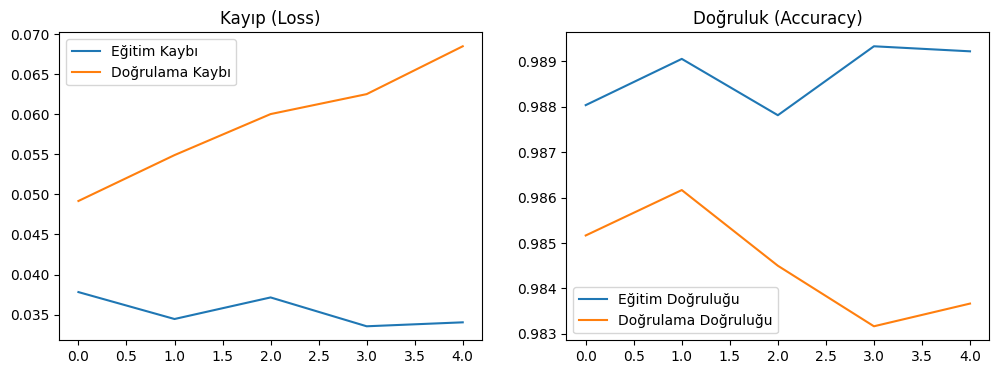

In [62]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend(); plt.title('Kayıp (Loss)')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend(); plt.title('Doğruluk (Accuracy)')
plt.show()


In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test doğruluğu: {test_acc*100:.2f}%')


Test doğruluğu: 98.38%


In [64]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Eğitim doğruluğu: {train_acc:.2f}, Doğrulama doğruluğu: {val_acc:.2f}")


Eğitim doğruluğu: 0.99, Doğrulama doğruluğu: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


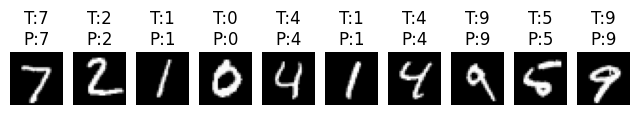

In [65]:
preds = model.predict(x_test)
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'T:{y_test[i]}\nP:{preds[i].argmax()}')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Yanlış tahmin edilen örnek sayısı: 162


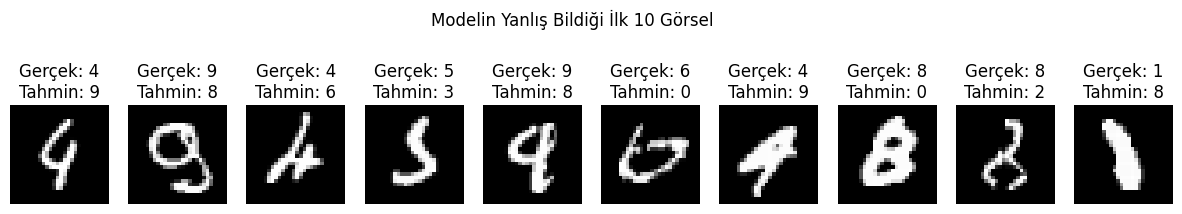

In [66]:
import numpy as np
import matplotlib.pyplot as plt
# Tüm test setinde tahmin yap
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
wrong_indices = np.where(pred_labels != y_test)[0]
print(f"Yanlış tahmin edilen örnek sayısı: {len(wrong_indices)}")

plt.figure(figsize=(15,3))
for i, idx in enumerate(wrong_indices[:10]):  # İlk 10 yanlış tahmini göster
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"Gerçek: {y_test[idx]}\nTahmin: {pred_labels[idx]}")
plt.suptitle("Modelin Yanlış Bildiği İlk 10 Görsel")
plt.show()

In [67]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 730,336 (2.79 MB)

 Trainable params: 243,274 (950.29 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 486,550 (1.86 MB)

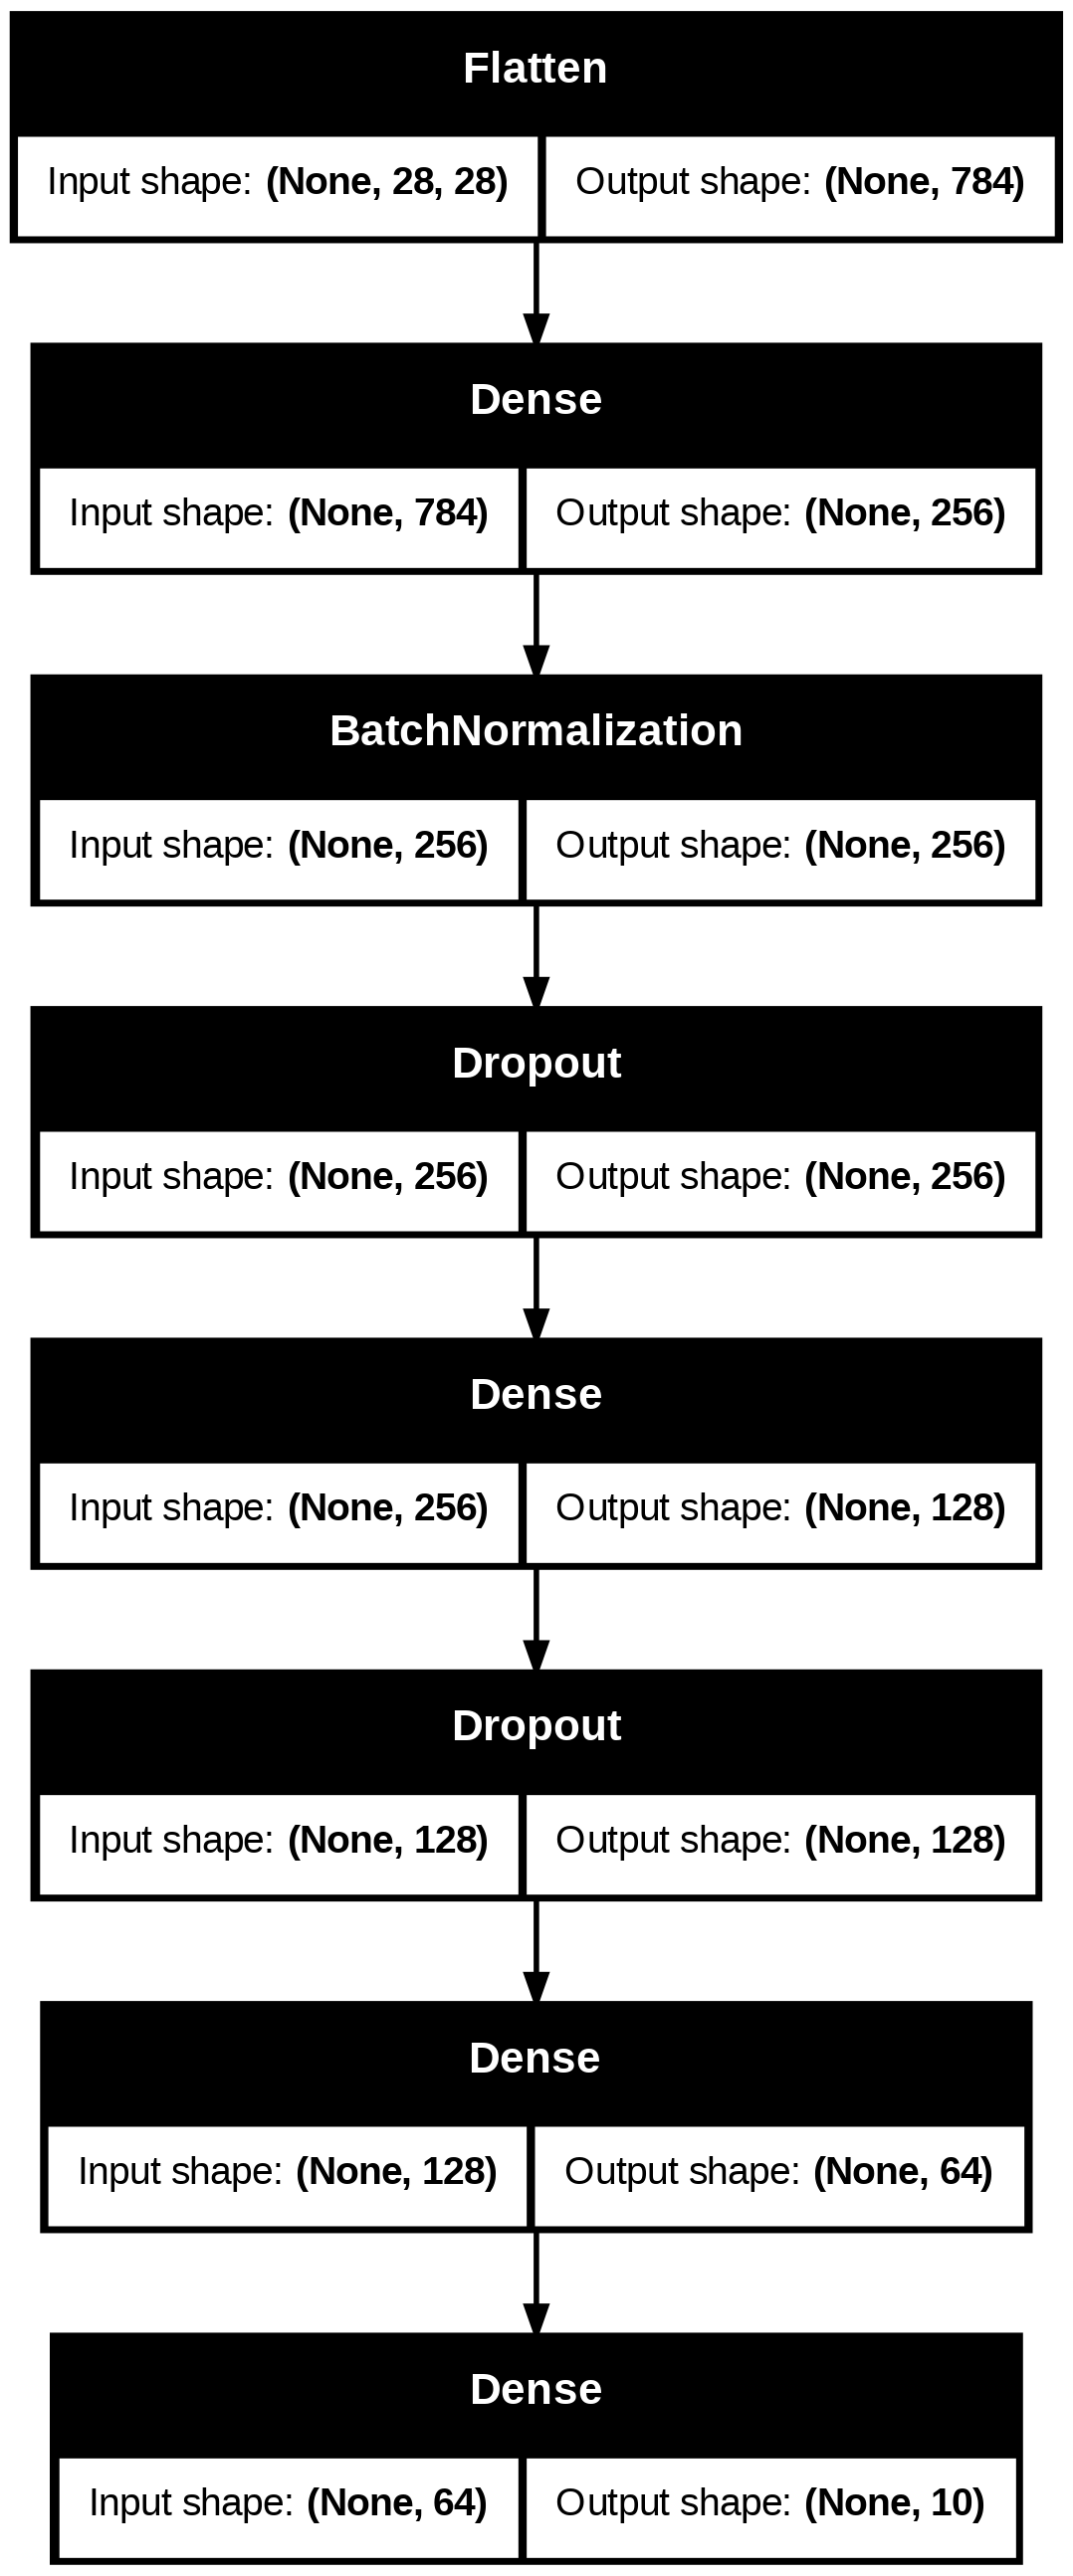

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


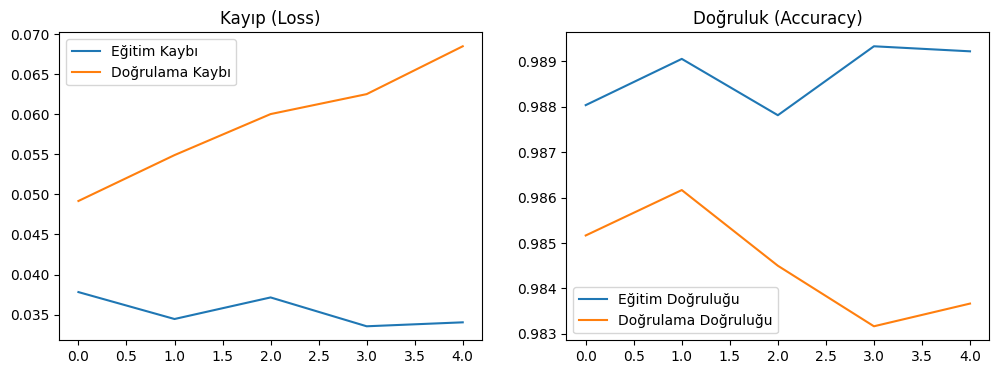

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend(); plt.title('Kayıp (Loss)')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend(); plt.title('Doğruluk (Accuracy)')
plt.show()


In [70]:
# 4. İkinci katmanın ağırlık ve biasları
W2, b2 = model.layers[2].get_weights()  # W2: (128,64), b2: (64,)
z2 = np.dot(a1, W2) + b2                # (64,)
a2 = np.maximum(0, z2)                  # ReLU aktivasyonu

# 5. Çıkış katmanının ağırlık ve biasları
W3, b3 = model.layers[3].get_weights()  # W3: (64,10), b3: (10,)
z3 = np.dot(a2, W3) + b3                # (10,)

# 6. Softmax ile olasılıkları bul
exp_z3 = np.exp(z3 - np.max(z3))        # Sayısal stabilite için max çıkarılır
prob = exp_z3 / np.sum(exp_z3)

print("Çıkış katmanı softmax olasılıkları:\n", prob)
print("Tahmin edilen rakam:", np.argmax(prob))
print("Gerçek rakam:", y_test[0])


ValueError: too many values to unpack (expected 2)